<a href="https://colab.research.google.com/github/daralynw/ds110_final_project_spring_2022/blob/main/Final_Project_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Summary


We will use Template 3 to analyze the COVID-19 global pandemic data, specifically the number of cases, deaths, vaccinations, and the country's GDP. We will use this data to figure out if there's a correlation between the date of the first vaccination in the country and when the death rate decreases and if there's a correlation between the number of vaccinations and the country's GDP.

# Importing the data 


The first thing we have to do is load the data into google colab

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files




In [ ]:
uploaded = files.upload() #cases and deaths

Saving Covid_cases_and_deaths.csv to Covid_cases_and_deaths.csv


In [ ]:
uploaded = files.upload() #vaccination file

Saving covid_vaccinations.csv to covid_vaccinations.csv


In [ ]:
uploaded = files.upload() #gdp file

Saving country_GDP.csv to country_GDP.csv


In [ ]:
df_cd = pd.read_csv('Covid_cases_and_deaths.csv')
df_v = pd.read_csv('covid_vaccinations.csv', index_col='COUNTRY')
df_gdp = pd.read_csv('country_GDP.csv', index_col='Country or Area')




# Scrubbing the Data

Once the data is uploaded into Google Colab, we notice that the data is filled with NaN values, which needs to be scrubbed. We can do this by locating the NaN values and getting rid of them.

In [ ]:
df_cd.isnull().sum() #NaN values in the cases and death data
df_cd = df_cd.dropna(axis=0,how="any")


In [ ]:
df_v.isnull().sum() #NaN values in the vaccination data
df_v = df_v.dropna(axis=0,how="any")




In [ ]:
df_gdp.isnull().sum() #NaN values in the GDP data
df_gdp = df_gdp.dropna(axis=0,how="any")



#Vaccination and GDP

I will be working on the vaccination and GDP branch

# Correlation Between Vaccination and Death Rate 

I will be analyzing data from the date of the first vaccination and when the death rate starts to decrease from one country in each continent

The first step is to slice the data. We don't need 2020 data so we can start from March 2021 to present day

In [ ]:
#First we split the cases and deaths data by country by using iloc
#we split from BEFORE the vaccine was accessible to all countries(before march 1,2021)
algeria_beforevac = df_cd.iloc[range(1802,2075)]
usa_beforevac = df_cd.iloc[range(186602,186875)]
germany_beforevac = df_cd.iloc[range(64502,64775)]
china_beforevac = df_cd.iloc[range(34802,35075)]
australia_beforevac = df_cd.iloc[range(9227,9500)]
canada_beforevac = df_cd.iloc[range(30677,30950)]
brazil_beforevac = df_cd.iloc[range(23252,23525)]





In [ ]:
#these points are AFTER the vaccine was released to all countries
algeria_aftervac = df_cd.iloc[range(2075,2474)]
usa_aftervac = df_cd.iloc[range(186875,187275)]
germany_aftervac = df_cd.iloc[range(64775,65175)]
china_aftervac = df_cd.iloc[range(35075,35475)]
australia_aftervac = df_cd.iloc[range(9500,9900)]
canada_aftervac = df_cd.iloc[range(30950,31350)]
brazil_aftervac = df_cd.iloc[range(23525,23925)]

In [ ]:
#Now we have to split the vaccine data with the corresponding countries that we 
#split in the cases and deaths data 
algeria_v = df_v.loc["Algeria",:]
usa_v = df_v.loc["United States of America",:]
germany_v = df_v.loc["Germany",:]
china_v = df_v.loc["China",:]
australia_v = df_v.loc["Australia",:]
canada_v = df_v.loc["Canada",:]
brazil_v = df_v.loc["Brazil",:]

# Plotting the data 

Now that all of the data is now split, we can now plot the data that will be used to observe the correlation between vaccinations and the number of cases and deaths. Our plots will only show data from after the vaccine was distributed.

Text(0, 0.5, 'Cumulative Deaths')

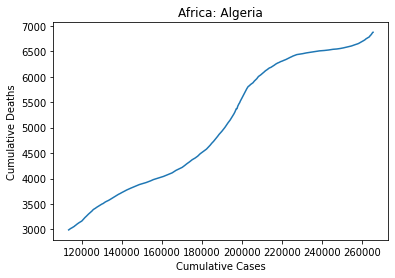

In [ ]:
 #comparing vaccinations and deaths
 #first step is to look at the relationship between cases and deaths
 #the x values are the cases and the y values are the deaths
 #graph for algeria's cases and deaths
 x_algeria = list(algeria_aftervac.loc[:,'Cumulative_cases'])
 y1 = list(algeria_aftervac.loc[:,'Cumulative_deaths'])
 plt.plot(x_algeria,y1)


plt.title('Africa: Algeria')
plt.xlabel('Cumulative Cases')
plt.ylabel('Cumulative Deaths')

Text(0, 0.5, 'Cumulative Deaths')

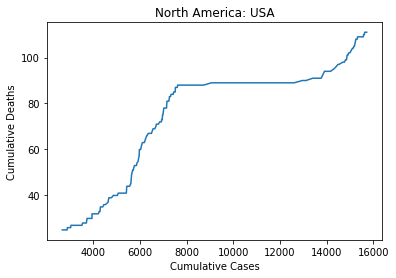

In [ ]:
 #graph for usa's cases and deaths
 x_usa = list(usa_aftervac.loc[:,'Cumulative_cases'])
 y2 = list(usa_aftervac.loc[:,'Cumulative_deaths'])
plt.plot(x_usa,y2)

plt.title('North America: USA')
plt.xlabel('Cumulative Cases')
plt.ylabel('Cumulative Deaths')

Text(0, 0.5, 'Cumulative Deaths')

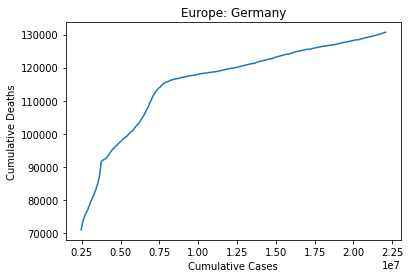

In [ ]:
 #graph for germany's cases and deaths
 x_germany = list(germany_aftervac.loc[:,'Cumulative_cases'])
 y3 = list(germany_aftervac.loc[:,'Cumulative_deaths'])
plt.plot(x_germany,y3)

plt.title('Europe: Germany')
plt.xlabel('Cumulative Cases')
plt.ylabel('Cumulative Deaths')

Text(0, 0.5, 'Cumulative Deaths')

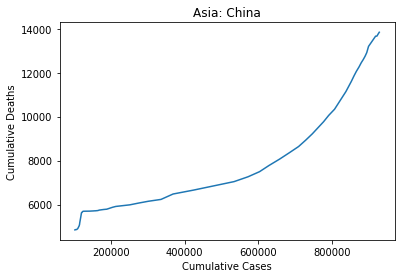

In [ ]:
 #graph for china's cases and deaths
 x_china = list(china_aftervac.loc[:,'Cumulative_cases'])
 y4 = list(china_aftervac.loc[:,'Cumulative_deaths'])
plt.plot(x_china,y4)

plt.title('Asia: China')
plt.xlabel('Cumulative Cases')
plt.ylabel('Cumulative Deaths')

Text(0, 0.5, 'Cumulative Deaths')

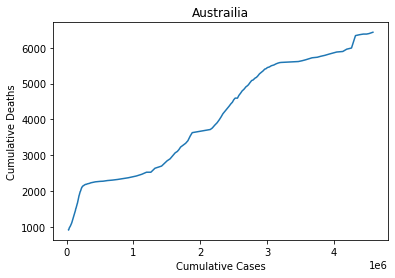

In [ ]:
 #graph for australia's cases and deaths
 x_australia = list(australia_aftervac.loc[:,'Cumulative_cases'])
 y5 = list(australia_aftervac.loc[:,'Cumulative_deaths'])
plt.plot(x_australia,y5)

plt.title('Austrailia')
plt.xlabel('Cumulative Cases')
plt.ylabel('Cumulative Deaths')

Text(0, 0.5, 'Cumulative Deaths')

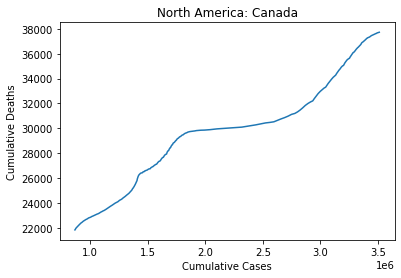

In [ ]:
 #graph for canada's cases and deaths
 x_canada = list(canada_aftervac.loc[:,'Cumulative_cases'])
 y6 = list(canada_aftervac.loc[:,'Cumulative_deaths'])
plt.plot(x_canada,y6)

plt.title('North America: Canada')
plt.xlabel('Cumulative Cases')
plt.ylabel('Cumulative Deaths')

Text(0, 0.5, 'Cumulative Deaths')

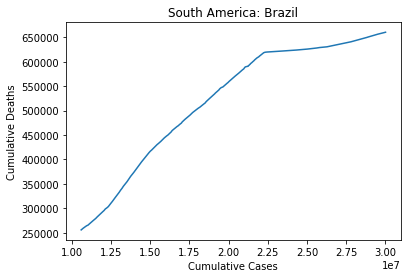

In [ ]:
 #graph for brazil's cases and deaths
 x_brazil = list(brazil_aftervac.loc[:,'Cumulative_cases'])
 y7 = list(brazil_aftervac.loc[:,'Cumulative_deaths'])
plt.plot(x_brazil,y7)

plt.title('South America: Brazil')
plt.xlabel('Cumulative Cases')
plt.ylabel('Cumulative Deaths')

Text(0, 0.5, 'Persons Fully Vaccinated')

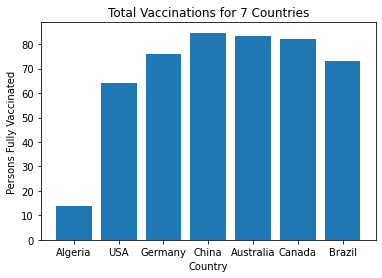

In [ ]:
#our next step is to plot the vaccination of each of the seven countries and compare them
x_countries = ['Algeria','USA','Germany', 'China','Australia','Canada','Brazil']
y_vaccinations = [algeria_v.PERSONS_FULLY_VACCINATED_PER100,usa_v.PERSONS_FULLY_VACCINATED_PER100,germany_v.PERSONS_FULLY_VACCINATED_PER100,china_v.PERSONS_FULLY_VACCINATED_PER100,
                  australia_v.PERSONS_FULLY_VACCINATED_PER100,canada_v.PERSONS_FULLY_VACCINATED_PER100,
                  brazil_v.PERSONS_FULLY_VACCINATED_PER100]
plt.bar(x_countries,y_vaccinations)

plt.title('Total Vaccinations for 7 Countries')
plt.xlabel('Country')
plt.ylabel('Persons Fully Vaccinated')

# Averages(Means)

Text(0, 0.5, 'Mean covid cases')

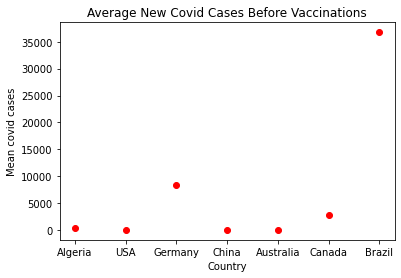

In [ ]:
#We can compare the means of each country's cases and deaths BEFORE the vaccinations
#Once we do this, we can put them on a graph 

#Lets start with the cases

algeria_cases_avg_beforevac = algeria_beforevac.loc[:,'New_cases'].mean()
usa_cases_avg_beforevac = usa_beforevac.loc[:,'New_cases'].mean()
germany_cases_avg_beforevac = germany_beforevac.loc[:,'New_cases'].mean()
china_cases_avg_beforevac = china_beforevac.loc[:,'New_cases'].mean()
australia_cases_avg_beforevac = australia_beforevac.loc[:,'New_cases'].mean()
canada_cases_avg_beforevac = canada_beforevac.loc[:,'New_cases'].mean()
brazil_cases_avg_beforevac = brazil_beforevac.loc[:,'New_cases'].mean()

xnames_beforevac = ['Algeria','USA','Germany','China','Australia','Canada','Brazil']
ycases_beforevac = [algeria_cases_avg_beforevac, usa_cases_avg_beforevac, germany_cases_avg_beforevac, china_cases_avg_beforevac,
          australia_cases_avg_beforevac, canada_cases_avg_beforevac, brazil_cases_avg_beforevac]

plt.figure()
plt.plot(xnames_beforevac, ycases_beforevac,'ro')
plt.title('Average New Covid Cases Before Vaccinations')
plt.xlabel('Country')
plt.ylabel('Mean covid cases')


Text(0, 0.5, 'Mean covid cases')

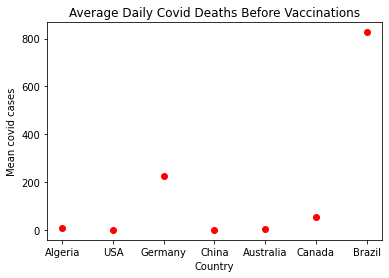

In [ ]:
#Now we can do the deaths from BEFORE the vaccine
algeria_deaths_avg_beforevac = algeria_beforevac.loc[:,'New_deaths'].mean()
usa_deaths_avg_beforevac = usa_beforevac.loc[:,'New_deaths'].mean()
germany_deaths_avg_beforevac = germany_beforevac.loc[:,'New_deaths'].mean()
china_deaths_avg_beforevac = china_beforevac.loc[:,'New_deaths'].mean()
australia_deaths_avg_beforevac = australia_beforevac.loc[:,'New_deaths'].mean()
canada_deaths_avg_beforevac = canada_beforevac.loc[:,'New_deaths'].mean()
brazil_deaths_avg_beforevac = brazil_beforevac.loc[:,'New_deaths'].mean()

xnames_beforevac = ['Algeria','USA','Germany','China','Australia','Canada','Brazil']
ydeaths_beforevac = [algeria_deaths_avg_beforevac, usa_deaths_avg_beforevac, germany_deaths_avg_beforevac, china_deaths_avg_beforevac,
          australia_deaths_avg_beforevac, canada_deaths_avg_beforevac, brazil_deaths_avg_beforevac]

plt.figure()
plt.plot(xnames_beforevac, ydeaths_beforevac,'ro')
plt.title('Average Daily Covid Deaths Before Vaccinations')
plt.xlabel('Country')
plt.ylabel('Mean covid cases')

Text(0, 0.5, 'Mean covid cases')

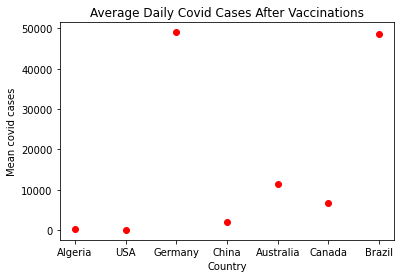

In [ ]:
#We can compare the means of each country's cases and deaths AFTER the vaccinations
#Once we do this, we can put them on a graph 

#Lets start with the cases


algeria_cases_avg_aftervac = algeria_aftervac.loc[:,'New_cases'].mean()
usa_cases_avg_aftervac = usa_aftervac.loc[:,'New_cases'].mean()
germany_cases_avg_aftervac = germany_aftervac.loc[:,'New_cases'].mean()
china_cases_avg_aftervac = china_aftervac.loc[:,'New_cases'].mean()
australia_cases_avg_aftervac = australia_aftervac.loc[:,'New_cases'].mean()
canada_cases_avg_aftervac = canada_aftervac.loc[:,'New_cases'].mean()
brazil_cases_avg_aftervac = brazil_aftervac.loc[:,'New_cases'].mean()

xnames = ['Algeria','USA','Germany','China','Australia','Canada','Brazil']
ycases_aftervac = [algeria_cases_avg_aftervac, usa_cases_avg_aftervac, germany_cases_avg_aftervac, china_cases_avg_aftervac,
          australia_cases_avg_aftervac, canada_cases_avg_aftervac, brazil_cases_avg_aftervac]

plt.figure()
plt.plot(xnames, ycases_aftervac,'ro')
plt.title('Average Daily Covid Cases After Vaccinations')
plt.xlabel('Country')
plt.ylabel('Mean covid cases')


Text(0, 0.5, 'Mean covid deaths')

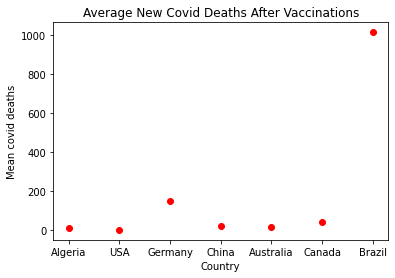

In [ ]:
#Now we can do the deaths

algeria_deaths_avg_aftervac = algeria_aftervac.loc[:,'New_deaths'].mean()
usa_deaths_avg_aftervac = usa_aftervac.loc[:,'New_deaths'].mean()
germany_deaths_avg_aftervac = germany_aftervac.loc[:,'New_deaths'].mean()
china_deaths_avg_aftervac = china_aftervac.loc[:,'New_deaths'].mean()
australia_deaths_avg_aftervac = australia_aftervac.loc[:,'New_deaths'].mean()
canada_deaths_avg_aftervac = canada_aftervac.loc[:,'New_deaths'].mean()
brazil_deaths_avg_aftervac = brazil_aftervac.loc[:,'New_deaths'].mean()

xnames = ['Algeria','USA','Germany','China','Australia','Canada','Brazil']
ydeaths_aftervac = [algeria_deaths_avg_aftervac, usa_deaths_avg_aftervac, germany_deaths_avg_aftervac, china_deaths_avg_aftervac,
          australia_deaths_avg_aftervac, canada_deaths_avg_aftervac, brazil_deaths_avg_aftervac]

plt.figure()
plt.plot(xnames, ydeaths_aftervac,'ro')
plt.title('Average New Covid Deaths After Vaccinations')
plt.xlabel('Country')
plt.ylabel('Mean covid deaths')

#Using the T-test

We can use the T-test to compare the means of cases and deaths from before the vaccine and after the vaccine

# Cases 

In [ ]:
#First we will do the t-test on the data that's before 
#the vaccine. We will compare the cases first for all of the countries
import scipy.stats
#this is for the Algeria data 
_, algeria_cases_p = scipy.stats.ttest_ind(algeria_beforevac["New_cases"], algeria_aftervac["New_cases"])
algeria_cases_p #value is greater than 0.05 so it is significant 

0.9441496199552809

In [ ]:
#for the USA data
_, usa_cases_p = scipy.stats.ttest_ind(usa_beforevac["New_cases"], usa_aftervac["New_cases"])
usa_cases_p 

6.308955456075539e-06

In [ ]:
#for the germany data
_, germany_cases_p = scipy.stats.ttest_ind(germany_beforevac["New_cases"], germany_aftervac["New_cases"])
germany_cases_p 

5.985766444824764e-19

In [ ]:
#For the China data 
_, china_cases_p = scipy.stats.ttest_ind(china_beforevac["New_cases"], china_aftervac["New_cases"])
china_cases_p 

4.836674801335589e-06

In [ ]:
#For the Australia data
_, australia_cases_p = scipy.stats.ttest_ind(australia_beforevac["New_cases"], australia_aftervac["New_cases"])
australia_cases_p 

1.1987578989049993e-12

In [ ]:
#for the Canada data
_, canada_cases_p = scipy.stats.ttest_ind(canada_beforevac["New_cases"], canada_aftervac["New_cases"])
canada_cases_p 

2.835833398259264e-12

In [ ]:
#For the brazil data
_, brazil_cases_p = scipy.stats.ttest_ind(brazil_beforevac["New_cases"], brazil_aftervac["New_cases"])
brazil_cases_p 

4.834589732162516e-05

# Deaths

In [ ]:
#Now we will compare the deaths in each of the seven countries
#For the algeria data
_, algeria_deaths_p = scipy.stats.ttest_ind(algeria_beforevac["New_deaths"], algeria_aftervac["New_deaths"])
algeria_deaths_p 

0.05107800711390418

In [ ]:
#For the USA data 
_, usa_deaths_p = scipy.stats.ttest_ind(usa_beforevac["New_deaths"], usa_aftervac["New_deaths"])
usa_deaths_p 

7.58814256361916e-05

In [ ]:
#For the germany data
_, germany_deaths_p = scipy.stats.ttest_ind(germany_beforevac["New_deaths"], germany_aftervac["New_deaths"])
germany_deaths_p 

2.287133695086523e-05

In [ ]:
#For the China data
_, china_deaths_p = scipy.stats.ttest_ind(china_beforevac["New_deaths"], china_aftervac["New_deaths"])
china_deaths_p 

3.3358093524173885e-08

In [ ]:
#For the Australia data
_, australia_deaths_p = scipy.stats.ttest_ind(australia_beforevac["New_deaths"], australia_aftervac["New_deaths"])
australia_deaths_p 

1.3868349446499565e-10

In [ ]:
#For the Canada data
_, canada_deaths_p = scipy.stats.ttest_ind(canada_beforevac["New_deaths"], canada_aftervac["New_deaths"])
canada_deaths_p 

7.475504268830169e-05

In [ ]:
#For the Brazil data
_, brazil_deaths_p = scipy.stats.ttest_ind(brazil_beforevac["New_deaths"], brazil_aftervac["New_deaths"])
brazil_deaths_p 

0.002346417873168316

# Putting the t-test values into a dataframe

In [ ]:
cases_ttest = pd.DataFrame({"Country": ["Algeria", "USA", "Germany", "China",
                                        "Australia", "Canada", "Brazil"],
                            "T-test_cases": [algeria_cases_p, usa_cases_p,
                                             germany_cases_p, china_cases_p,
                                             australia_cases_p, canada_cases_p,
                                             brazil_cases_p]})
cases_ttest

,Country,T-test_cases
0,Algeria,9.441496e-01
1,USA,6.308955e-06
2,Germany,5.985766e-19
3,China,4.836675e-06
4,Australia,1.198758e-12
5,Canada,2.835833e-12
6,Brazil,4.834590e-05


In [ ]:
deaths_ttest = pd.DataFrame({"Country": ["Algeria", "USA", "Germany", "China",
                                        "Australia", "Canada", "Brazil"],
                            "T-test_deaths": [algeria_deaths_p, usa_deaths_p,
                                             germany_deaths_p, china_deaths_p,
                                             australia_deaths_p, canada_deaths_p,
                                             brazil_deaths_p]})
deaths_ttest

,Country,T-test_deaths
0,Algeria,5.107801e-02
1,USA,7.588143e-05
2,Germany,2.287134e-05
3,China,3.335809e-08
4,Australia,1.386835e-10
5,Canada,7.475504e-05
6,Brazil,2.346418e-03
